## Lección 2: Hipótesis del Mercado Eficiente.

### Objetivos Notebook Lección 2:

1. Proveer un ejemplo de aprendizaje no supervisado como es el uso dendogramas para analizar la covarianza de los activos.
2. Proveer un ejemplo de aprendizaje supervisado como es un modelo de señal de compra y de venta de acciones
3. Modelar el precio de las acciones como un movimiento browniano geométrico

### Modelos de Aprendizaje No Supervisado.

Realizar Aprendizaje no supervisado en el contexto de Statistical Learning se trata de ejecutar métodos de Machine Learning sobre datos que no han sido etiquetados, o dicho de otra manera data que no tiene una variable respuesta. Las dos principales categorías de aprendizaje no supervisado son el Análisis de Componentes Principales (PCA) y el 'Clustering'. En la sesión de factores de riesgo trabajaremos el tema de PCA. Por lo que en este notebook presentaremos el tema de Clustering. 

### Clustering

El Clustering consiste en organizar los datos en grupos llamados 'Clusters'. Un 'Cluster' contiene un subconjunto de observaciones extraídas de los datos que son consideradas 'similares' entre ellas (bajo alguna métrica de distancia). Idealmente las observaciones pertenecientes al cluster deberían ser muy similares entre ellas y diferentes de las observaciones pertenecientes a otros clusters. 


### Hierarchical Clustering

En los algoritmos de clustering generales, no existe una relación definida entre los clusters. Bajo hierarchical clustering se crea una estructura jerárquica de Clusters. Esta estructura jerárquica se puede crear de forma aglomerativa o de forma divisoria: 

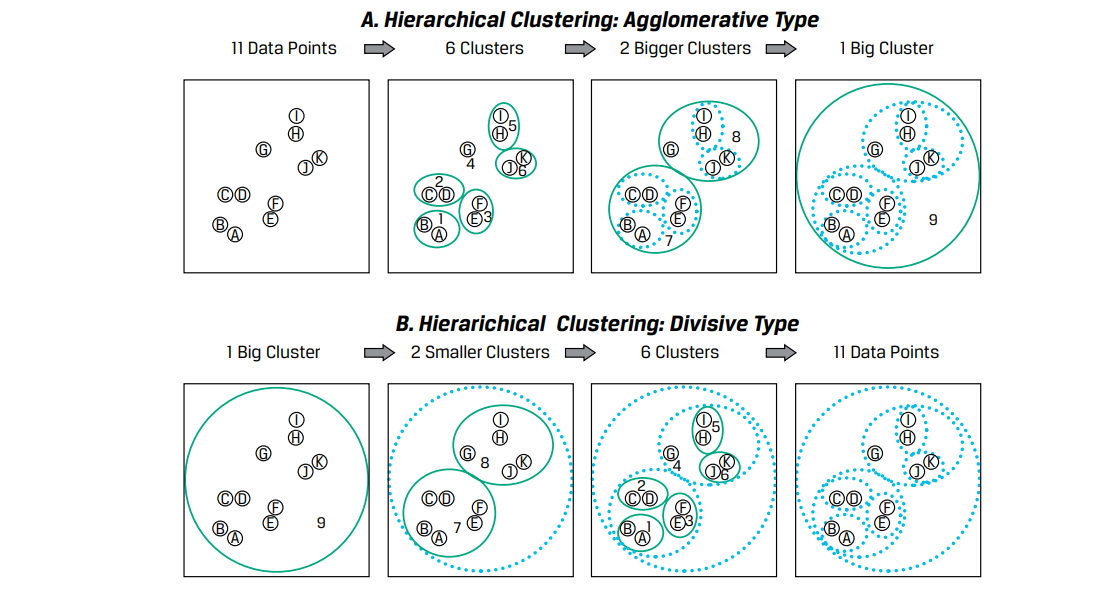

Tomado de: CFA (2024): Quantiative Methods L2V1.  

Para determinar que tanto se parecen los clusters, se usan métricas como el máximo, mínimo o promedio de la distancia entre cada pareja de puntos de cada cluster. 

### Dendogramas. 

Para leer los dendogramas se ha de tener en cuenta, que:

* Los arcos son las líneas hortizontales 
* Las dendritas son las líneas verticales
* La longitud de cada dendrita representa la distancia entre dos clusters. Dendritos mas cortos implican una menor distancia (y mayor similitud) entre los clusters.  

In [1]:
import pandas as pd
from librerias.finance_operators import calculateLogReturns
from librerias.Technical_Indicators import *
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from librerias.Backtest import *

C:\Users\jcamargo\AppData\Local\Temp\ipykernel_44516\2272308311.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_assets_classes = pd.read_csv('datos\\'+'activos_dendograma.csv', encoding='utf-8', sep = ';')
df_assets_classes = df_assets_classes.set_index('id')
df_assets_classes = calculateLogReturns(df_assets_classes)

### Codificación de los Tickers
diccionario_tickers = {'G0QA_TRR_INDEX_VAL_LOC': 'UST 0-1', 
                       'GVQ0_TRR_INDEX_VAL_LOC': 'UST 1-5', 
                       'G6O2_TRR_INDEX_VAL_LOC': 'UST 5-10',
                       'GVQI_TRR_INDEX_VAL_LOC': 'TIPS 1-5', 
                       'G6QI_TRR_INDEX_VAL_LOC': 'TIPS 5-10', 
                       'C01A_TRR_INDEX_VAL_LOC': 'Corp 0-1', 
                       'CV10_TRR_INDEX_VAL_LOC': 'Corp 1-5',
                       'GS1V_TRR_INDEX_VAL_LOC': 'SSA', 
                       'M0A0_TRR_INDEX_VAL_LOC': 'MBS', 
                       'SPX_INDEX': 'Equity'
                       }
df_assets_classes = df_assets_classes.rename(columns = diccionario_tickers)
df_assets_classes

,UST 0-1,UST 1-5,UST 5-10,TIPS 1-5,TIPS 5-10,Corp 0-1,Corp 1-5,SSA,MBS,Equity
id,,,,,,,,,,
31/01/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/02/2006,-0.000040,-0.001118,-0.002253,-0.001911,-0.003200,-0.000160,-0.001295,-0.001087,-0.001705,0.001850
2/02/2006,0.000113,-0.000023,0.000253,-0.000893,-0.001013,-0.000020,0.000161,0.000106,0.000202,-0.009102
3/02/2006,0.000142,0.000231,0.001555,0.001004,0.002470,0.000140,0.000173,0.000064,0.000713,-0.005373
6/02/2006,0.000187,-0.000156,-0.000269,0.000095,0.000022,0.000370,-0.000008,-0.000120,0.000301,0.000783
...,...,...,...,...,...,...,...,...,...,...
14/12/2023,0.000242,0.002097,0.006359,0.004811,0.011709,0.000451,0.003303,0.003633,0.005817,0.002644
15/12/2023,0.000251,-0.000915,-0.000865,-0.001193,-0.001442,-0.000081,-0.000974,-0.000915,-0.002875,-0.000076
18/12/2023,0.000182,-0.000391,-0.001695,-0.000495,-0.002212,0.000262,-0.000299,-0.000383,-0.002225,0.004518


In [3]:
correlation_matrix = df_assets_classes.corr()
correlation_matrix

,UST 0-1,UST 1-5,UST 5-10,TIPS 1-5,TIPS 5-10,Corp 0-1,Corp 1-5,SSA,MBS,Equity
UST 0-1,1.000000,0.633364,0.468338,0.384323,0.338896,0.167888,0.405347,0.625509,0.374453,-0.167781
UST 1-5,0.633364,1.000000,0.923492,0.662850,0.723489,0.151490,0.781974,0.972968,0.768063,-0.266338
UST 5-10,0.468338,0.923492,1.000000,0.615224,0.787026,0.120519,0.750584,0.896817,0.797421,-0.286790
TIPS 1-5,0.384323,0.662850,0.615224,1.000000,0.887040,0.203841,0.658366,0.660166,0.582942,-0.029916
TIPS 5-10,0.338896,0.723489,0.787026,0.887040,1.000000,0.178860,0.693789,0.709752,0.705767,-0.111729
Corp 0-1,0.167888,0.151490,0.120519,0.203841,0.178860,1.000000,0.504217,0.143455,0.167834,0.019277
Corp 1-5,0.405347,0.781974,0.750584,0.658366,0.693789,0.504217,1.000000,0.783886,0.697253,-0.103146
SSA,0.625509,0.972968,0.896817,0.660166,0.709752,0.143455,0.783886,1.000000,0.744427,-0.255963
MBS,0.374453,0.768063,0.797421,0.582942,0.705767,0.167834,0.697253,0.744427,1.000000,-0.049023
Equity,-0.167781,-0.266338,-0.286790,-0.029916,-0.111729,0.019277,-0.103146,-0.255963,-0.049023,1.000000


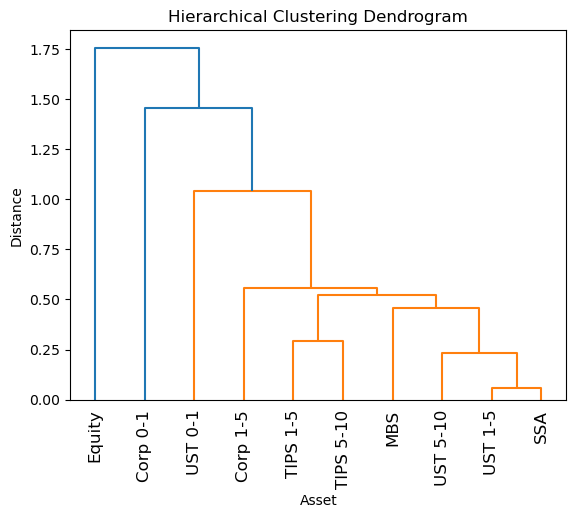

In [4]:
linkage_matrix = linkage(correlation_matrix, method='single')
# Plot the dendrogram
dendrogram(linkage_matrix, labels=[*diccionario_tickers.values()])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Asset')
plt.xticks(rotation=90)
plt.ylabel('Distance')
plt.show()

In [5]:
linkage_matrix

array([[ 1.        ,  7.        ,  0.05625962,  2.        ],
       [ 2.        , 10.        ,  0.23295773,  3.        ],
       [ 3.        ,  4.        ,  0.29477706,  2.        ],
       [ 8.        , 11.        ,  0.45555796,  4.        ],
       [12.        , 13.        ,  0.5236875 ,  6.        ],
       [ 6.        , 14.        ,  0.5568887 ,  7.        ],
       [ 0.        , 15.        ,  1.03999166,  8.        ],
       [ 5.        , 16.        ,  1.45465426,  9.        ],
       [ 9.        , 17.        ,  1.75821595, 10.        ]])

### Modelos de Aprendizaje supervisado

Los modelos de Aprendizaje supervisado, se aplican sobre datos cuya variable de respuesta tengan una etiqueta. En finanzas una etiqueta usual es el retorno en alguna franja de tiempo sobre la que se esté tomando una posición. Particularmente, se puede tomar como ejemplo el caso del análisis técnico para encontrar señales de compra o de venta.

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
stocks_df = pd.read_csv('datos\\'+'Tech Stocks.csv', encoding='utf-8', sep = ';')

In [7]:
stocks_df.index = pd.to_datetime(stocks_df.iloc[:,0], utc= True)
stocks_df = stocks_df.iloc[:,1:]
stocks_df

,Microsoft,Apple
Date,,
1986-03-13 05:00:00+00:00,0.060274,0.085501
1986-03-14 05:00:00+00:00,0.062427,0.090250
1986-03-17 05:00:00+00:00,0.063504,0.089818
1986-03-18 05:00:00+00:00,0.061889,0.092842
1986-03-19 05:00:00+00:00,0.060812,0.091546
...,...,...
2024-01-22 05:00:00+00:00,396.510010,193.889999
2024-01-23 05:00:00+00:00,398.899994,195.179993
2024-01-24 05:00:00+00:00,402.559998,194.500000


In [8]:
# Esta funcíón crea una señala de compra o de venta según las bandas de Bollinger. 
# Las bandas de Bollinger son +/- dos Desviaciónes Estándar por encima o por debajo de la media de corto plazo
# La Desviación Estándar se calcula en ventanas móviles. 
signal = create_bollinger_band_signal(stocks_df[['Microsoft','Apple']],10)
signal

,Microsoft,Apple
Date,,
1986-03-13 05:00:00+00:00,0,0
1986-03-14 05:00:00+00:00,0,0
1986-03-17 05:00:00+00:00,0,0
1986-03-18 05:00:00+00:00,0,0
1986-03-19 05:00:00+00:00,0,0
...,...,...
2024-01-22 05:00:00+00:00,0,-1
2024-01-23 05:00:00+00:00,0,0
2024-01-24 05:00:00+00:00,0,0


In [9]:
# Esta función obliga a tener solamente una señal en el horizont definido en el argumento lookahead_days 
filtered_signals = filter_signals(signal, lookahead_days = 20)
filtered_signals

,Microsoft,Apple
Date,,
1986-03-13 05:00:00+00:00,0,0
1986-03-14 05:00:00+00:00,0,0
1986-03-17 05:00:00+00:00,0,0
1986-03-18 05:00:00+00:00,0,0
1986-03-19 05:00:00+00:00,0,0
...,...,...
2024-01-22 05:00:00+00:00,0,0
2024-01-23 05:00:00+00:00,0,0
2024-01-24 05:00:00+00:00,0,0


In [10]:
# Esta función encuentra los precios de cierre en un horizonte definido en la variable lookahead days 
lookahead_prices = get_lookahead_prices(stocks_df, lookahead_days = 20)
lookahead_prices

,Microsoft,Apple
Date,,
1986-03-13 05:00:00+00:00,0.061889,0.093274
1986-03-14 05:00:00+00:00,0.062427,0.092842
1986-03-17 05:00:00+00:00,0.062427,0.094569
1986-03-18 05:00:00+00:00,0.064580,0.097591
1986-03-19 05:00:00+00:00,0.065118,0.100182
...,...,...
2024-01-22 05:00:00+00:00,NaN,NaN
2024-01-23 05:00:00+00:00,NaN,NaN
2024-01-24 05:00:00+00:00,NaN,NaN


In [11]:
# Esta función obtiene el retorno en el horizonte que se definió creando la series lookahead return
lookahead_return = get_return_lookahead(stocks_df, lookahead_prices)
lookahead_return

,Microsoft,Apple
Date,,
1986-03-13 05:00:00+00:00,0.026432,0.087015
1986-03-14 05:00:00+00:00,0.000000,0.028311
1986-03-17 05:00:00+00:00,-0.017103,0.051539
1986-03-18 05:00:00+00:00,0.042566,0.049893
1986-03-19 05:00:00+00:00,0.068408,0.090145
...,...,...
2024-01-22 05:00:00+00:00,NaN,NaN
2024-01-23 05:00:00+00:00,NaN,NaN
2024-01-24 05:00:00+00:00,NaN,NaN


In [12]:
# Esta función obtiene el retorno asociado a haber seguido las señales de compra o de venta.
signal_returns = get_signal_return(filtered_signals, lookahead_return)
signal_returns

,Microsoft,Apple
Date,,
1986-03-13 05:00:00+00:00,0.0,0.0
1986-03-14 05:00:00+00:00,0.0,0.0
1986-03-17 05:00:00+00:00,-0.0,0.0
1986-03-18 05:00:00+00:00,0.0,0.0
1986-03-19 05:00:00+00:00,0.0,0.0
...,...,...
2024-01-22 05:00:00+00:00,NaN,NaN
2024-01-23 05:00:00+00:00,NaN,NaN
2024-01-24 05:00:00+00:00,NaN,NaN


In [13]:
# Eliminar aquellas fechas donde no se puede calcular el retorno.
signal_returns = signal_returns.dropna()

In [14]:
# Revisar algunas estadísticas descriptivas 
signal_returns.iloc[:-1000,:].describe()

,Microsoft,Apple
count,8525.000000,8525.000000
mean,-0.000237,-0.000461
std,0.017139,0.025088
min,-0.287682,-0.984429
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,0.452438,0.364646


In [15]:
### Filtramos aquellas observaciones que no tengan una señal de compra o de venta 
long_short_signal_returns = signal_returns[signal_returns != 0].stack()
long_short_signal_returns = long_short_signal_returns.reset_index().iloc[:, [1,2]]
long_short_signal_returns.columns = ['ticker', 'signal_return']
long_short_signal_returns.index = long_short_signal_returns['ticker']
long_short_signal_returns = long_short_signal_returns.iloc[:,1:]
long_short_signal_returns

,signal_return
ticker,
Microsoft,-0.099258
Apple,-0.266445
Microsoft,0.008031
Microsoft,0.117784
Apple,0.070147
...,...
Microsoft,0.028702
Microsoft,-0.075146
Apple,0.094110


In [16]:
long_short_signal_returns.loc['Microsoft',:].describe()

,signal_return
count,341.000000
mean,-0.007071
std,0.089522
min,-0.287682
25%,-0.053341
50%,-0.008723
75%,0.042468
max,0.452438


In [17]:
long_short_signal_returns.loc['Apple',:].describe()

,signal_return
count,354.000000
mean,-0.013255
std,0.126118
min,-0.984429
25%,-0.085139
50%,-0.013019
75%,0.060214
max,0.364646


In [18]:
microsoft_signal_rtn = signal_returns.loc[signal_returns['Microsoft'] != 0,'Microsoft']
microsoft_signal_rtn

Date
1986-04-11 05:00:00+00:00   -0.099258
1986-05-21 04:00:00+00:00    0.008031
1986-05-29 04:00:00+00:00    0.117784
1986-06-26 04:00:00+00:00    0.040819
1986-08-12 04:00:00+00:00   -0.025104
                               ...   
2023-05-26 04:00:00+00:00   -0.005034
2023-07-18 04:00:00+00:00    0.110570
2023-09-20 04:00:00+00:00    0.028702
2023-10-06 04:00:00+00:00   -0.075146
2023-12-04 05:00:00+00:00    0.003947
Name: Microsoft, Length: 341, dtype: float64

In [19]:
observation_number = round(len(microsoft_signal_rtn)*0.6)
observation_number

205

In [20]:
X_train = microsoft_signal_rtn.iloc[:observation_number]
X_test = microsoft_signal_rtn.iloc[-1*observation_number:]

In [21]:

# Se puede usar el test de 2 muestras de Kolmogorov Smirnov 
# Para medir si la estrategía se ha venido deteriorando en el tiempo
stats.ks_2samp(X_train, X_test)

KstestResult(statistic=0.0975609756097561, pvalue=0.2838848524511593, statistic_location=-0.024096353654280644, statistic_sign=1)

### Simulación del precio de una acción con modelo de movimiento browniano geométrico. 

Tomando la serie de la acción de Microsoft

* Graficar precio ajustado de la acción de Microsoft.
* Graficar histograma con los retornos logarítmicos de Microsoft. 
* Realizar un diagrama de dispersión de la rentabilidad en el día t-1 vs la rentabilidad del día t. Calcular el coeficiente de correlación entre los mismos. 
* Realice una simulación usando el modelo de movimiento browniano geométrico 

In [22]:
import numpy as np
import pandas as pd
microsoft_stock = stocks_df.loc[:,'Microsoft']
microsoft_stock

Date
1986-03-13 05:00:00+00:00      0.060274
1986-03-14 05:00:00+00:00      0.062427
1986-03-17 05:00:00+00:00      0.063504
1986-03-18 05:00:00+00:00      0.061889
1986-03-19 05:00:00+00:00      0.060812
                                ...    
2024-01-22 05:00:00+00:00    396.510010
2024-01-23 05:00:00+00:00    398.899994
2024-01-24 05:00:00+00:00    402.559998
2024-01-25 05:00:00+00:00    404.869995
2024-01-26 05:00:00+00:00    403.929993
Name: Microsoft, Length: 9545, dtype: float64

<Axes: xlabel='Date'>

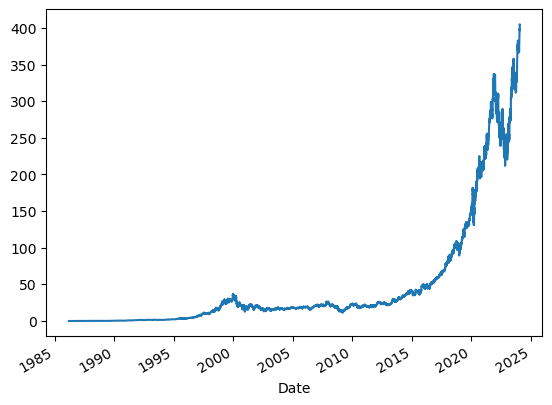

In [23]:
microsoft_stock.plot()

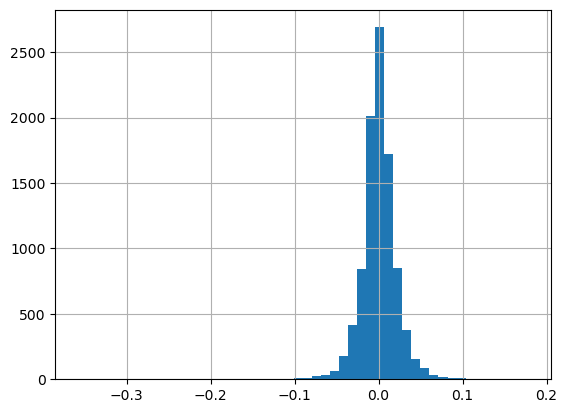

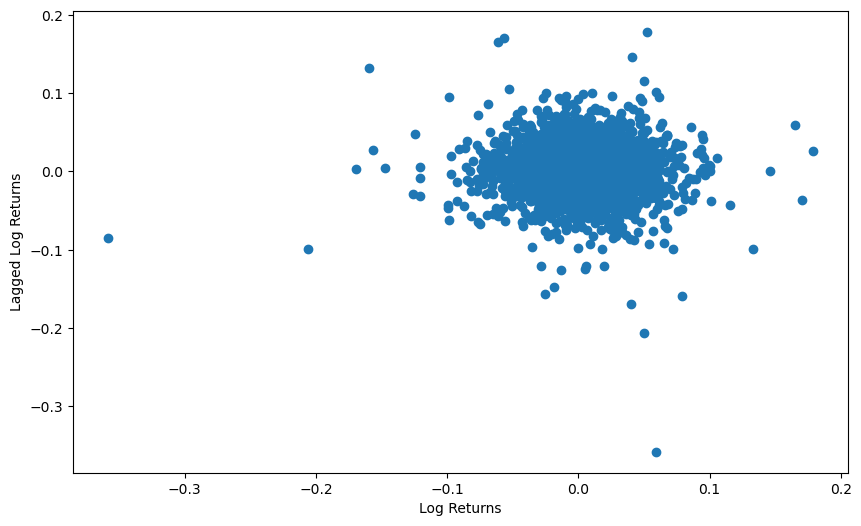

In [24]:
log_returns_microsoft = calculateLogReturns(microsoft_stock)
log_returns_microsoft.hist(bins = 50).plot()
log_returns_microsoft_lagged = log_returns_microsoft.shift()

import matplotlib.pyplot as plt

# Calculate the lagged series
log_returns_microsoft_lagged = log_returns_microsoft.shift()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(log_returns_microsoft, log_returns_microsoft_lagged)
plt.xlabel('Log Returns')
plt.ylabel('Lagged Log Returns')
plt.show()

In [25]:
# Calculate correlation coefficient
correlation = log_returns_microsoft.corr(log_returns_microsoft_lagged)
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.0177506972749495


### Simulación del movimiento browniando geométrico. 

Usando la especificación disponible en el paper de  

$dS_{t} = uS_{t}dt+\sigma S_{t}  d W_{t}$

Se puede llegar a la siguiente solución analítica para el precio spot del movimiento browniano geométrico:

$ S_t = S_{0}(e^{(u -\frac{\sigma^{2}}{2})t + \sigma W_{t}}) $

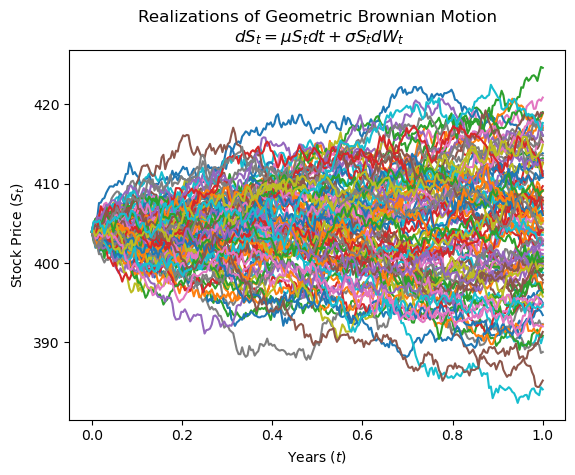

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
# drift coefficent
mu = log_returns_microsoft.mean()
# number of steps
n = 252
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = microsoft_stock.iloc[-1]
# volatility
sigma = log_returns_microsoft.std()

# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)

# Define time interval correctly 
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$"
)
plt.show()

### Referencias

Simulating Geometric Brownian Motion (GBM) in Python, QuantPy. (n.d.). Retrieved from https://quantpy.com.au/stochastic-calculus/simulating-geometric-brownian-motion-gbm-in-python/

Leong, L. (2022, January 19). How to test if trading algorithm performance is deteriorating. Gradient Growth. https://medium.com/gradient-growth/how-to-test-if-trading-algorithm-performance-is-deteriorating-30d469056a04

https://github.com/eduardohoc/Technical-Analysis-and-Backtest-Functions
